In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 读取数据
data_path = "./data/input.pkl"
df = pd.read_pickle(data_path)

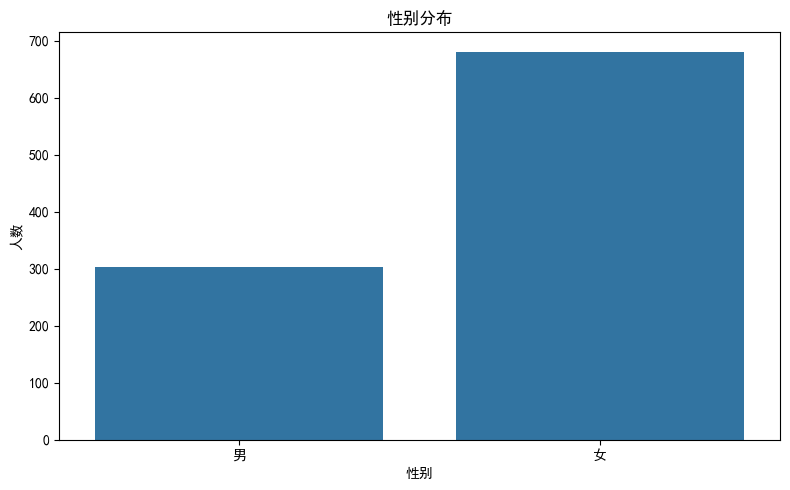

In [3]:
# 性别分布统计
sex_counts = df["sex"].value_counts().sort_index()
sex_labels = {1: "男", 2: "女"}
sex_counts.index = [sex_labels.get(i, str(i)) for i in sex_counts.index]

plt.figure(figsize=(8, 5))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title("性别分布")
plt.xlabel("性别")
plt.ylabel("人数")
plt.tight_layout()
plt.show()

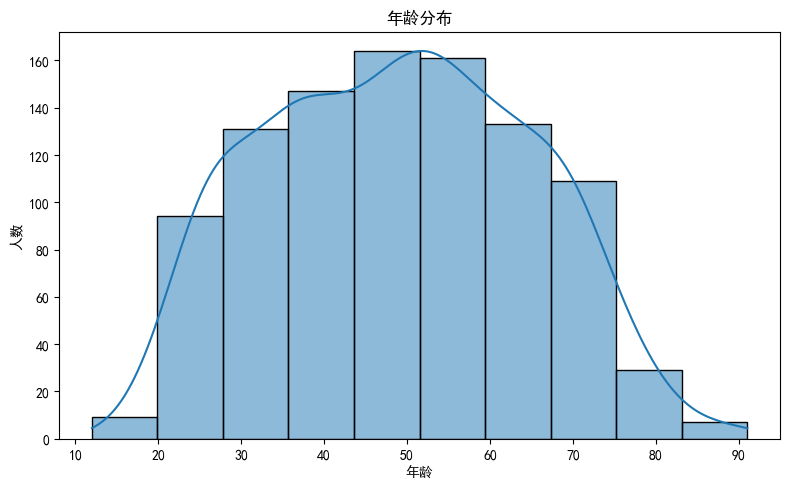

In [4]:
# 年龄分布统计
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=10, kde=True)
plt.title("年龄分布")
plt.xlabel("年龄")
plt.ylabel("人数")
plt.tight_layout()
plt.show()

In [5]:
# 拆分每个样本为四条记录
def split_samples(df):
    records = []
    for _, row in df.iterrows():
        for suffix in ["b1", "b2", "g1", "g2"]:
            record = {
                "id": row["id"],
                "sex": row["sex"],
                "age": row["age"],
                "ecg": row[f"ecg_{suffix}"],
                "ppg": row[f"ppg_{suffix}"],
                "hbp": row[f"hbp_{suffix}"],
                "lbp": row[f"lbp_{suffix}"],
            }
            records.append(record)
    return pd.DataFrame(records)


df_long = split_samples(df)

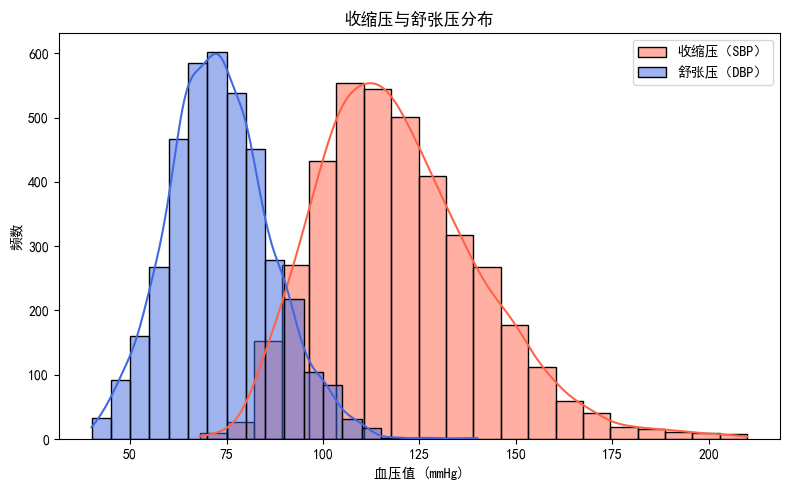

In [6]:
# 血压分布可视化
plt.figure(figsize=(8, 5))
sns.histplot(df_long["hbp"], bins=20, kde=True, color='tomato', label='收缩压（SBP）')
sns.histplot(df_long["lbp"], bins=20, kde=True, color='royalblue', label='舒张压（DBP）')
plt.title("收缩压与舒张压分布")
plt.xlabel("血压值 (mmHg)")
plt.ylabel("频数")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
# 筛选误差偏大的患者
bp_range = df_long.groupby("id")[["hbp", "lbp"]].agg(lambda x: x.max() - x.min()).reset_index()

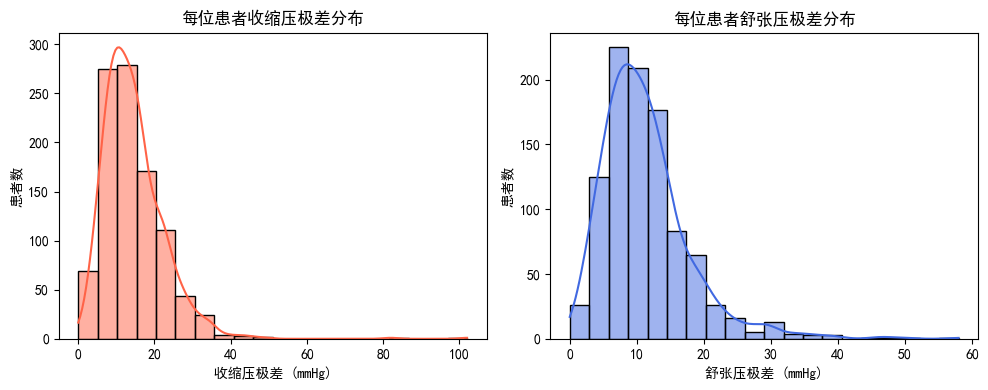

In [8]:
# 可视化极差分组分布
plt.figure(figsize=(10,4))
bp_range["极差类型"] = bp_range.apply(
    lambda row: "SBP" if row["hbp"] >= row["lbp"] else "DBP", axis=1
)
plt.subplot(1,2,1)
sns.histplot(bp_range["hbp"], bins=20, color="tomato", kde=True)
plt.title("每位患者收缩压极差分布")
plt.xlabel("收缩压极差 (mmHg)")
plt.ylabel("患者数")

plt.subplot(1,2,2)
sns.histplot(bp_range["lbp"], bins=20, color="royalblue", kde=True)
plt.title("每位患者舒张压极差分布")
plt.xlabel("舒张压极差 (mmHg)")
plt.ylabel("患者数")

plt.tight_layout()
plt.show()

In [9]:
df_long_clean = df_long[
    (df_long["hbp"] < 180) &
    (df_long["lbp"] > 50)
].reset_index(drop=True)
print(df_long_clean.shape[0])

3732


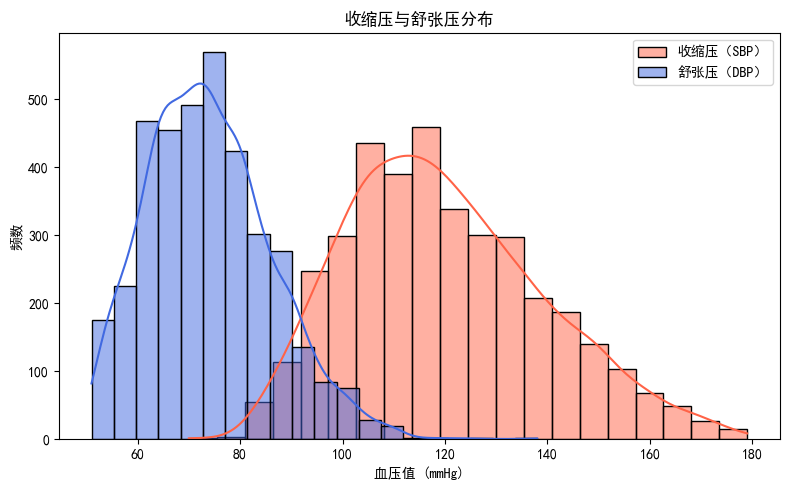

In [10]:
# 血压分布可视化
plt.figure(figsize=(8, 5))
sns.histplot(df_long_clean["hbp"], bins=20, kde=True, color='tomato', label='收缩压（SBP）')
sns.histplot(df_long_clean["lbp"], bins=20, kde=True, color='royalblue', label='舒张压（DBP）')
plt.title("收缩压与舒张压分布")
plt.xlabel("血压值 (mmHg)")
plt.ylabel("频数")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# 保存
df_long_clean.to_pickle("./data/df_long_clean.pkl")